825230138 - Valen Ezekiel Oscar - Projek UAS Big Data

---
---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uas = pd.read_excel("Data Mentah_Belitung.xlsx")

In [3]:
uas.head(10)

,Tanggal,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,2010-01-01,23.7,29.4,26.2,96,25.2,2.3,5,270,3,W
1,2010-01-02,24.4,30.9,26.6,92,8888,3.7,4,270,2,W
2,2010-01-03,24.4,29.2,26.2,91,1.2,2,6,240,3,NE
3,2010-01-04,22.8,31.8,26.7,92,25.6,4.3,5,270,2,S
4,2010-01-05,23.3,26,24.1,99,1.8,0,3,180,2,NW
5,2010-01-06,23,28.9,25.6,90,0,1.8,7,160,4,N
6,2010-01-07,23.3,30.2,25.6,93,0.8,0.9,5,100,3,W
7,2010-01-08,23.6,29,26,97,15.8,0,6,270,3,S
8,2010-01-09,22.8,28.4,26,98,2.7,0,5,360,2,N
9,2010-01-10,22.4,30.4,25.2,85,0,-,6,360,3,NW


In [4]:
uas.tail(10)

,Tanggal,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
5469,2024-12-22,23.3,30.4,27.7,85,1.5,0.2,11,350,3,N
5470,2024-12-23,25.1,30.6,27.1,90,0,1.7,6,360,3,N
5471,2024-12-24,24.6,27.8,25.3,99,37.2,3,5,330,1,NE
5472,2024-12-25,22.9,31.2,27.3,89,36.9,0,8,350,2,N
5473,2024-12-26,24.6,29.7,26.5,89,1,7.4,4,190,1,S
5474,2024-12-27,23.8,31,26.9,88,14.7,0.4,4,260,2,W
5475,2024-12-28,24.6,30.5,27.5,90,0,2.8,6,350,2,N
5476,2024-12-29,24,30.2,27.6,89,0,2.7,5,340,2,N
5477,2024-12-30,25.7,30.8,27,89,1,2.9,9,300,3,NW
5478,2024-12-31,24,30.7,26.9,89,24.9,1,8,340,3,N


In [5]:
uas.describe()

,Tanggal
count,5479
mean,2017-07-01 23:59:59.999999744
min,2010-01-01 00:00:00
25%,2013-10-01 12:00:00
50%,2017-07-02 00:00:00
75%,2021-04-01 12:00:00
max,2024-12-31 00:00:00


In [6]:
# Menampilkan ukuran data
# Jumlah baris
print("Jumlah sampel (baris) = ", uas.shape[0])
# Jumlah kolom
print("Jumlah variabel (kolom) = ", uas.shape[1])

Jumlah sampel (baris) =  5479
Jumlah variabel (kolom) =  11


In [7]:
# Mencetak nama kolom
nama_kolom = uas.columns
nama_kolom

Index(['Tanggal', 'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X',
       'FF_AVG', 'DDD_CAR'],
      dtype='object')

In [8]:
uas['TN'] = pd.to_numeric(uas['TN'], errors='coerce')
uas['TX'] = pd.to_numeric(uas['TX'], errors='coerce')
uas['TAVG'] = pd.to_numeric(uas['TAVG'], errors='coerce')
uas['RH_AVG'] = pd.to_numeric(uas['RH_AVG'], errors='coerce')
uas['RR'] = pd.to_numeric(uas['RR'], errors='coerce')
uas['SS'] = pd.to_numeric(uas['SS'], errors='coerce')
uas['FF_X'] = pd.to_numeric(uas['FF_X'], errors='coerce')
uas['DDD_X'] = pd.to_numeric(uas['DDD_X'], errors='coerce')
uas['FF_AVG'] = pd.to_numeric(uas['FF_AVG'], errors='coerce')

In [9]:
# Menampilkan deskripsi statistika (nilai rata-rata, standar deviasi, nilai minimum, nilai maksimum, dan kuartil)
D = uas.describe()
D

,Tanggal,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG
count,5479,5200.00000,5126.000000,5221.000000,5230.000000,5181.000000,5085.000000,5370.000000,5374.000000,5371.000000
mean,2017-07-01 23:59:59.999999744,23.55950,31.437027,26.684218,86.685832,528.361204,11.860197,6.346704,206.712132,3.415379
min,2010-01-01 00:00:00,19.60000,22.600000,22.700000,24.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013-10-01 12:00:00,23.00000,30.400000,26.000000,83.000000,0.000000,2.000000,5.000000,130.000000,2.000000
50%,2017-07-02 00:00:00,23.60000,31.600000,26.700000,88.000000,2.000000,4.500000,6.000000,180.000000,2.000000
75%,2021-04-01 12:00:00,24.10000,32.700000,27.400000,91.000000,16.600000,6.800000,8.000000,300.000000,3.000000
max,2024-12-31 00:00:00,26.80000,36.200000,34.200000,100.000000,9999.000000,9999.000000,18.000000,360.000000,350.000000
std,NaN,0.90151,1.783922,1.094843,7.661585,2082.048953,265.135486,2.340252,100.760724,17.362561


CEK KOLOM SESUAI NILAI

---



In [10]:
# Menemukan kapan kolom TN mencapai nilai tertinggi
uas[uas['TN']==26.8]

,Tanggal,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
5458,2024-12-11,26.8,31.9,28.4,83.0,0.0,6.3,10.0,330.0,4.0,NW


In [11]:
# Menemukan kapan kolom TX mencapai nilai tertinggi
uas[uas['TX']==36.2]

,Tanggal,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
1735,2014-10-02,21.2,36.2,28.9,68.0,0.0,8.0,7.0,120.0,6.0,SE


In [12]:
# Menemukan kapan kolom TAVG mencapai nilai tertinggi
uas[uas['TAVG']==34.2]

,Tanggal,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
3967,2020-11-11,NaN,23.3,34.2,28.5,80.0,8888.0,7.0,4.0,160.0,2


In [13]:
# Menemukan kapan kolom TX mencapai nilai tertinggi
uas[uas['FF_AVG']==350]

,Tanggal,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
3977,2020-11-21,NaN,23.0,31.2,26.8,91.0,24.9,3.6,4.0,350.0,1


DST......

---



In [14]:
# Menemukan polutan yang memiliki nilai terendah
D = uas.describe()
min_val = D.loc['min', D.columns != 'Tanggal']
print('Polutan yang memiliki nilai paling rendah adalah', min_val.idxmin(), 'sebesar ', min_val.min())

Polutan yang memiliki nilai paling rendah adalah RR sebesar  0.0


In [15]:
# Menghitung nilai duplikat
uas.duplicated().sum()

np.int64(0)

In [16]:
# Menghitung jumlah nilai yang hilang (missing values)
uas.isna().sum()

,0
Tanggal,0
TN,279
TX,353
TAVG,258
RH_AVG,249
RR,298
SS,394
FF_X,109
DDD_X,105
FF_AVG,108


In [17]:
# Menghitung persentase nilai yang hilang (missing values)
uas.isna().sum()/len(uas)*100

,0
Tanggal,0.000000
TN,5.092170
TX,6.442782
TAVG,4.708888
RH_AVG,4.544625
RR,5.438949
SS,7.191093
FF_X,1.989414
DDD_X,1.916408
FF_AVG,1.971163


In [18]:
# Mengganti nilai tidak valid menjadi null
uas.replace(8888, np.nan, inplace=True)
uas.replace(9999, np.nan, inplace=True)
uas.replace("-", np.nan, inplace=True)

In [19]:
# Menghitung persentase nilai yang hilang (missing values)
uas.isna().sum()/len(uas)*100

,0
Tanggal,0.000000
TN,5.092170
TX,6.442782
TAVG,4.708888
RH_AVG,4.544625
RR,10.950903
SS,7.264099
FF_X,1.989414
DDD_X,1.916408
FF_AVG,1.971163


In [20]:
# Mengisi missing values menggunakan metode forward fill
# ffill() dan backward fill bfill()
uas = uas.ffill()
uas = uas.bfill()

In [21]:
# Menghitung persentase nilai yang hilang (missing values)
uas.isna().sum()/len(uas)*100

,0
Tanggal,0.0
TN,0.0
TX,0.0
TAVG,0.0
RH_AVG,0.0
RR,0.0
SS,0.0
FF_X,0.0
DDD_X,0.0
FF_AVG,0.0


In [22]:
uas_copy = uas.copy()
uas.to_excel('Belitung Data Bersih.xlsx', index=False)

In [23]:
# Menambahkan kolom Tahun, Bulan, dan Hari pada
# data frame yang diekstraksi dari kolom Tanggal
uas['Tahun'] = pd.DatetimeIndex(uas['Tanggal']).year
uas['Bulan'] = pd.DatetimeIndex(uas['Tanggal']).month
uas['Hari'] = uas['Tanggal'].dt.day_name()

In [24]:
uas.head()

,Tanggal,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR,Tahun,Bulan,Hari
0,2010-01-01,23.7,29.4,26.2,96.0,25.2,2.3,5.0,270.0,3.0,W,2010,1,Friday
1,2010-01-02,24.4,30.9,26.6,92.0,25.2,3.7,4.0,270.0,2.0,W,2010,1,Saturday
2,2010-01-03,24.4,29.2,26.2,91.0,1.2,2.0,6.0,240.0,3.0,NE,2010,1,Sunday
3,2010-01-04,22.8,31.8,26.7,92.0,25.6,4.3,5.0,270.0,2.0,S,2010,1,Monday
4,2010-01-05,23.3,26.0,24.1,99.0,1.8,0.0,3.0,180.0,2.0,NW,2010,1,Tuesday


In [25]:
# Menampilkan ukuran data
# Jumlah baris
print("Jumlah sampel (baris) = ", uas.shape[0])
# Jumlah kolom
print("Jumlah variabel (kolom) = ", uas.shape[1])

Jumlah sampel (baris) =  5479
Jumlah variabel (kolom) =  14


In [26]:
# Menampilkan nilai unik dari kolom Tahun
uas['Tahun'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024], dtype=int32)

In [27]:
# Mencari rata-rata dari TN di setiap tahunnya
uas.groupby('Tahun')['TN'].mean('TN')

,TN
Tahun,
2010,23.453425
2011,23.021096
2012,23.083607
2013,23.299726
2014,23.182740
2015,23.294521
2016,23.912568
2017,23.757534
2018,23.509863


In [28]:
# Hitung jumlah (frekuensi) untuk setiap arah angin utama
frekuensi_arah = uas['DDD_CAR'].value_counts().loc[['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']]

# Tampilkan hasilnya
print("Frekuensi Arah Angin Meteorologi Belitung (2010–2024):")
print("------------------------------------------------------")
for arah, jumlah in frekuensi_arah.items():
    print(f"{arah}: {jumlah} kali")

# Tambahan ringkasan
total_data = frekuensi_arah.sum()
arah_terbanyak = frekuensi_arah.idxmax()
jumlah_terbanyak = frekuensi_arah.max()
arah_tersedikit = frekuensi_arah.idxmin()
jumlah_tersedikit = frekuensi_arah.min()

print("\nRingkasan:")
print(f"Total pengamatan arah angin utama: {total_data} kali")
print(f"Arah angin paling sering muncul: {arah_terbanyak} ({jumlah_terbanyak} kali)")
print(f"Arah angin paling jarang muncul: {arah_tersedikit} ({jumlah_tersedikit} kali)")


Frekuensi Arah Angin Meteorologi Belitung (2010–2024):
------------------------------------------------------
N: 17 kali
NE: 146 kali
E: 14 kali
SE: 1356 kali
S: 31 kali
SW: 98 kali
W: 4 kali
NW: 491 kali

Ringkasan:
Total pengamatan arah angin utama: 2157 kali
Arah angin paling sering muncul: SE (1356 kali)
Arah angin paling jarang muncul: W (4 kali)


Text(0.5, 0, 'Arah Angin')

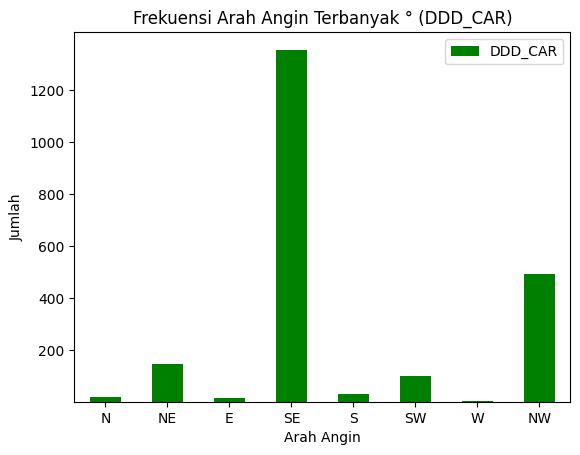

In [29]:
uas.groupby('DDD_CAR')['DDD_CAR'].count().loc[['N','NE','E','SE','S','SW','W','NW']].plot(kind='bar', color='green', legend=True)
plt.xticks(rotation=0)
plt.title('Frekuensi Arah Angin Terbanyak ° (DDD_CAR)')
plt.ylabel('Jumlah')
plt.yticks([200, 400, 600, 800, 1000, 1200], ['200', '400', '600', '800', '1000', '1200'])
plt.xlabel('Arah Angin')

Data Tahunan / Bulanan / Harian

---
---



In [30]:
# Hitung rata-rata per tahun untuk semua kolom yang digunakan
rata_rata_per_tahun = uas.groupby('Tahun')[['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']].mean()

# Cetak hasilnya dalam bentuk teks
print("Data Rata-Rata Tahunan Meteorologi Belitung (2010–2024):\n")
print(rata_rata_per_tahun.round(2))  # dibulatkan 2 angka di belakang koma

# Hitung rata-rata keseluruhan (bukan per tahun)
mean_keseluruhan = uas[['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']].mean()

# Cetak hasilnya
print("Rata-Rata Meteorologi Belitung Periode 2010–2024:\n")
print(mean_keseluruhan.round(2))


Data Rata-Rata Tahunan Meteorologi Belitung (2010–2024):

          TN     TX   TAVG  RH_AVG     RR    SS  FF_X   DDD_X  FF_AVG
Tahun                                                                
2010   23.45  30.80  26.17   90.56  11.82  3.05  5.32  207.11    1.63
2011   23.02  31.27  26.32   86.65   7.77  3.94  6.86  210.61    2.60
2012   23.08  31.52  26.38   86.64   7.08  4.01  6.44  188.80    2.65
2013   23.30  31.46  26.38   87.74  10.40  4.12  6.27  214.57    2.16
2014   23.18  32.08  26.84   83.57   6.72  5.28  6.58  206.79    2.75
2015   23.29  31.84  26.76   84.44   8.79  5.80  5.90  209.73    2.65
2016   23.91  31.45  26.73   88.37  11.37  3.97  5.84  214.24    1.93
2017   23.76  31.05  26.60   88.56  10.90  4.18  6.41  212.58    2.22
2018   23.51  31.34  26.63   86.44   9.16  5.08  6.84  205.96    2.27
2019   23.71  31.98  26.94   85.56   9.32  4.87  6.68  198.90    2.22
2020   23.81  30.70  27.12   82.54  18.18  5.45  6.20  190.05   19.25
2021   23.67  31.09  26.52   88.

In [31]:
# Hitung rata-rata per bulan (Januari–Desember) untuk semua variabel
rata_rata_per_bulan = uas.groupby('Bulan')[['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']].mean()

# Cetak tabel rata-rata per bulan
print("Data Rata-Rata Bulanan Meteorologi Belitung (2010–2024):\n")
print(rata_rata_per_bulan.round(2))  # dibulatkan 2 angka di belakang koma

print("\nStatistik Bulanan Januari–Desember (berdasarkan rata-rata bulanan selama 2010–2024):")
print("----------------------------------------------------------------------------------------")

# Buat ringkasan statistik per variabel
for kolom in rata_rata_per_bulan.columns:
    min_val = round(rata_rata_per_bulan[kolom].min(), 2)
    max_val = round(rata_rata_per_bulan[kolom].max(), 2)
    mean_val = round(rata_rata_per_bulan[kolom].mean(), 2)

    print(f"{kolom}: Range = {min_val} – {max_val}, Rata-rata = {mean_val}")


Data Rata-Rata Bulanan Meteorologi Belitung (2010–2024):

          TN     TX   TAVG  RH_AVG     RR    SS  FF_X   DDD_X  FF_AVG
Bulan                                                                
1      23.81  30.04  26.34   88.74  12.02  3.46  7.25  292.13    3.00
2      23.76  30.48  26.39   87.98   8.78  4.77  7.16  296.73    2.79
3      23.76  31.12  26.59   88.38   8.05  4.41  6.11  278.06    2.05
4      23.69  31.51  26.49   89.75  13.07  4.20  5.27  220.99    1.53
5      23.99  32.06  26.95   88.80  10.99  4.23  5.55  161.70    1.62
6      23.66  31.88  26.79   86.69   8.95  4.55  5.88  154.54    2.03
7      23.40  31.73  26.79   84.74   7.11  5.29  6.29  148.73    2.39
8      23.17  32.29  27.02   81.51   4.49  6.04  7.63  135.21    3.05
9      23.08  32.79  27.19   80.93   5.70  5.65  7.21  145.44    2.72
10     23.26  32.25  26.84   85.81   9.97  4.28  6.09  175.38    2.13
11     23.44  30.89  26.54   86.15  18.71  4.33  5.06  204.97   15.43
12     23.72  30.22  26.26   90.

In [32]:
# Hitung rata-rata per hari (Senin–Minggu) untuk semua variabel
rata_rata_per_hari = uas.groupby('Hari')[['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X', 'FF_AVG']].mean()

# Tampilkan tabel ringkasan rata-rata per hari
print("Data Rata-Rata Harian Meteorologi Belitung (2010–2024):\n")
print(rata_rata_per_hari.round(2))

# Tampilkan ringkasan statistik per variabel (range dan rata-rata)
print("\nStatistik Harian Senin–Minggu (berdasarkan rata-rata harian selama 2010–2024):")
print("---------------------------------------------------------------------------------")

for kolom in rata_rata_per_hari.columns:
    min_val = round(rata_rata_per_hari[kolom].min(), 2)
    max_val = round(rata_rata_per_hari[kolom].max(), 2)
    mean_val = round(rata_rata_per_hari[kolom].mean(), 2)

    print(f"{kolom}: Range = {min_val} – {max_val}, Rata-rata = {mean_val}")


Data Rata-Rata Harian Meteorologi Belitung (2010–2024):

              TN     TX   TAVG  RH_AVG     RR    SS  FF_X   DDD_X  FF_AVG
Hari                                                                     
Friday     23.52  31.47  26.68   86.67   9.23  4.50  6.30  210.16    3.35
Monday     23.58  31.38  26.65   86.89  10.07  4.26  6.28  205.49    3.72
Saturday   23.57  31.42  26.68   86.74  10.86  4.54  6.39  206.75    3.14
Sunday     23.54  31.43  26.67   86.69  10.79  4.44  6.34  209.04    3.84
Thursday   23.53  31.42  26.66   86.71  10.44  4.42  6.33  211.68    3.21
Tuesday    23.58  31.54  26.75   86.35  10.94  4.43  6.38  206.08    3.62
Wednesday  23.61  31.43  26.70   86.78   9.56  4.76  6.30  200.83    2.91

Statistik Harian Senin–Minggu (berdasarkan rata-rata harian selama 2010–2024):
---------------------------------------------------------------------------------
TN: Range = 23.52 – 23.61, Rata-rata = 23.56
TX: Range = 31.38 – 31.54, Rata-rata = 31.44
TAVG: Range = 26.65 – 26.

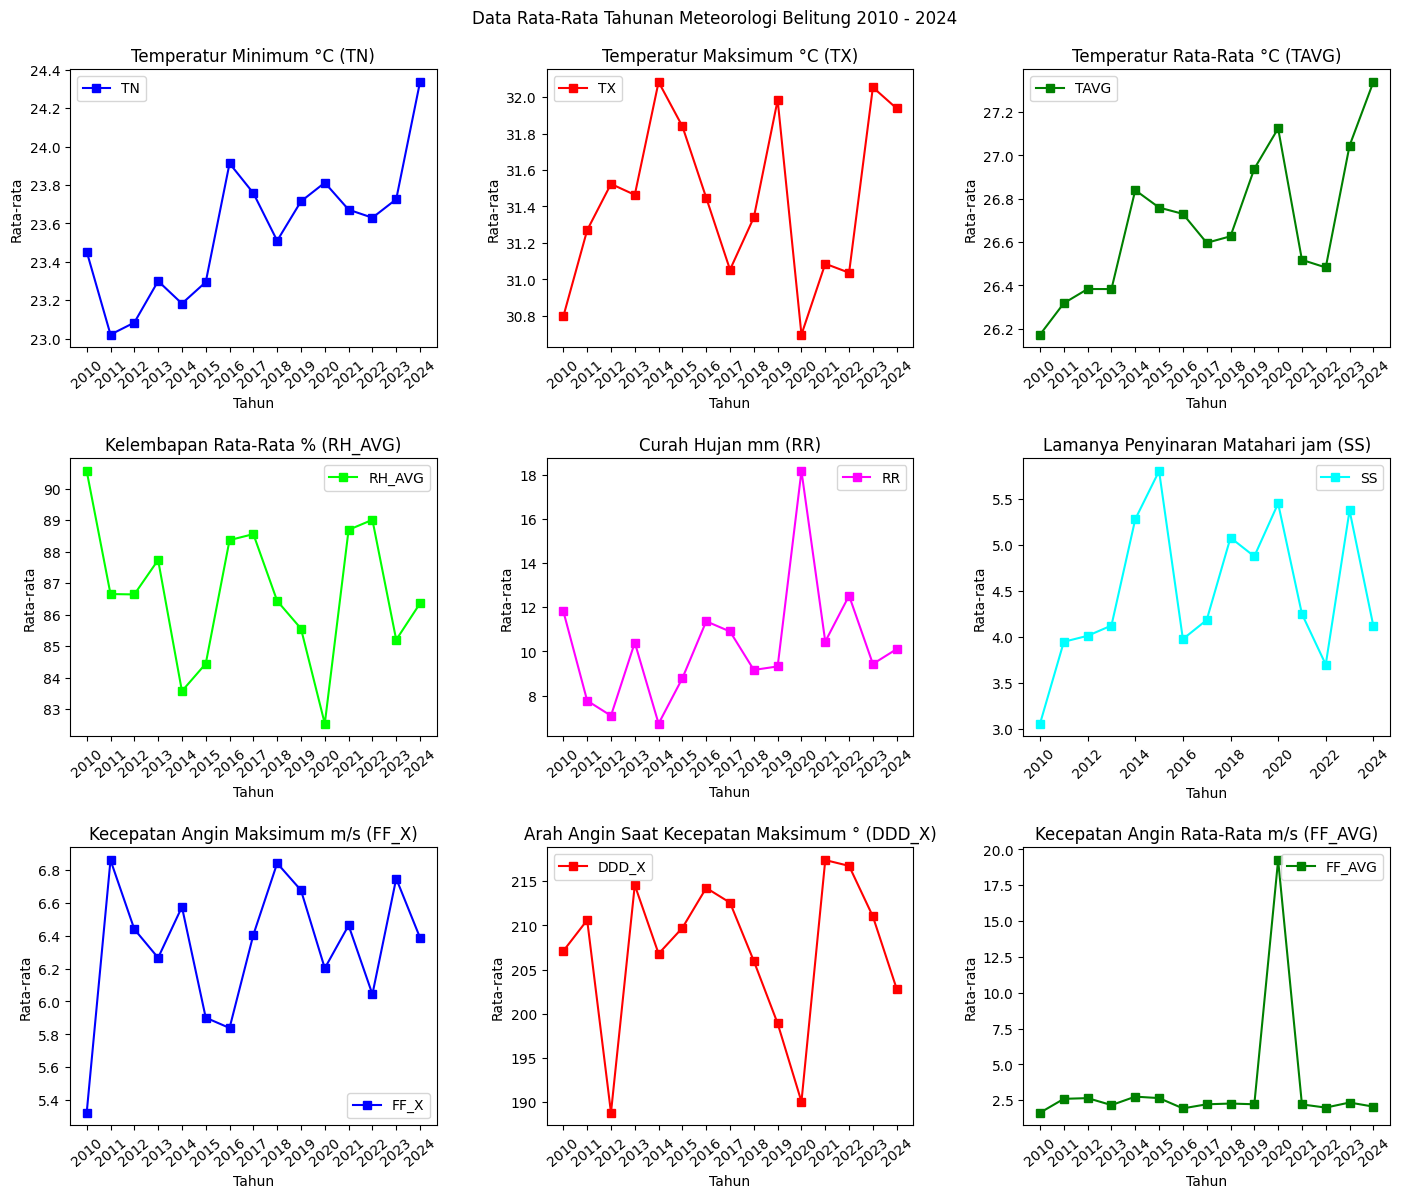

In [33]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(left=0.07, right=0.95, bottom=0.05, top=0.93, wspace=0.3, hspace=0.4)

plt.subplot(3, 3, 1)
uas.groupby('Tahun')['TN'].mean().plot(marker = 's', legend=True, color = 'blue')
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], rotation = 40)
plt.title('Temperatur Minimum °C (TN)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 2)
uas.groupby('Tahun')['TX'].mean().plot(marker = 's', legend=True, color = 'red')
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], rotation = 40)
plt.title('Temperatur Maksimum °C (TX)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 3)
uas.groupby('Tahun')['TAVG'].mean().plot(marker = 's', legend=True, color = 'green')
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], rotation = 40)
plt.title('Temperatur Rata-Rata °C (TAVG)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 4)
uas.groupby('Tahun')['RH_AVG'].mean().plot(marker = 's', legend=True, color = 'lime')
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], rotation = 40)
plt.title('Kelembapan Rata-Rata % (RH_AVG)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 5)
uas.groupby('Tahun')['RR'].mean().plot(marker = 's', legend=True, color = 'magenta')
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], rotation = 40)
plt.title('Curah Hujan mm (RR)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 6)
uas.groupby('Tahun')['SS'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.xticks(rotation = 45)
plt.title('Lamanya Penyinaran Matahari jam (SS)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 7)
uas.groupby('Tahun')['FF_X'].mean().plot(marker = 's', legend=True, color = 'blue')
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], rotation = 40)
plt.title('Kecepatan Angin Maksimum m/s (FF_X)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 8)
uas.groupby('Tahun')['DDD_X'].mean().plot(marker = 's', legend=True, color = 'red')
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], rotation = 40)
plt.title('Arah Angin Saat Kecepatan Maksimum ° (DDD_X)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 9)
uas.groupby('Tahun')['FF_AVG'].mean().plot(marker = 's', legend=True, color = 'green')
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'], rotation = 40)
plt.title('Kecepatan Angin Rata-Rata m/s (FF_AVG)')
plt.ylabel('Rata-rata')

plt.suptitle("Data Rata-Rata Tahunan Meteorologi Belitung 2010 - 2024")
plt.show()

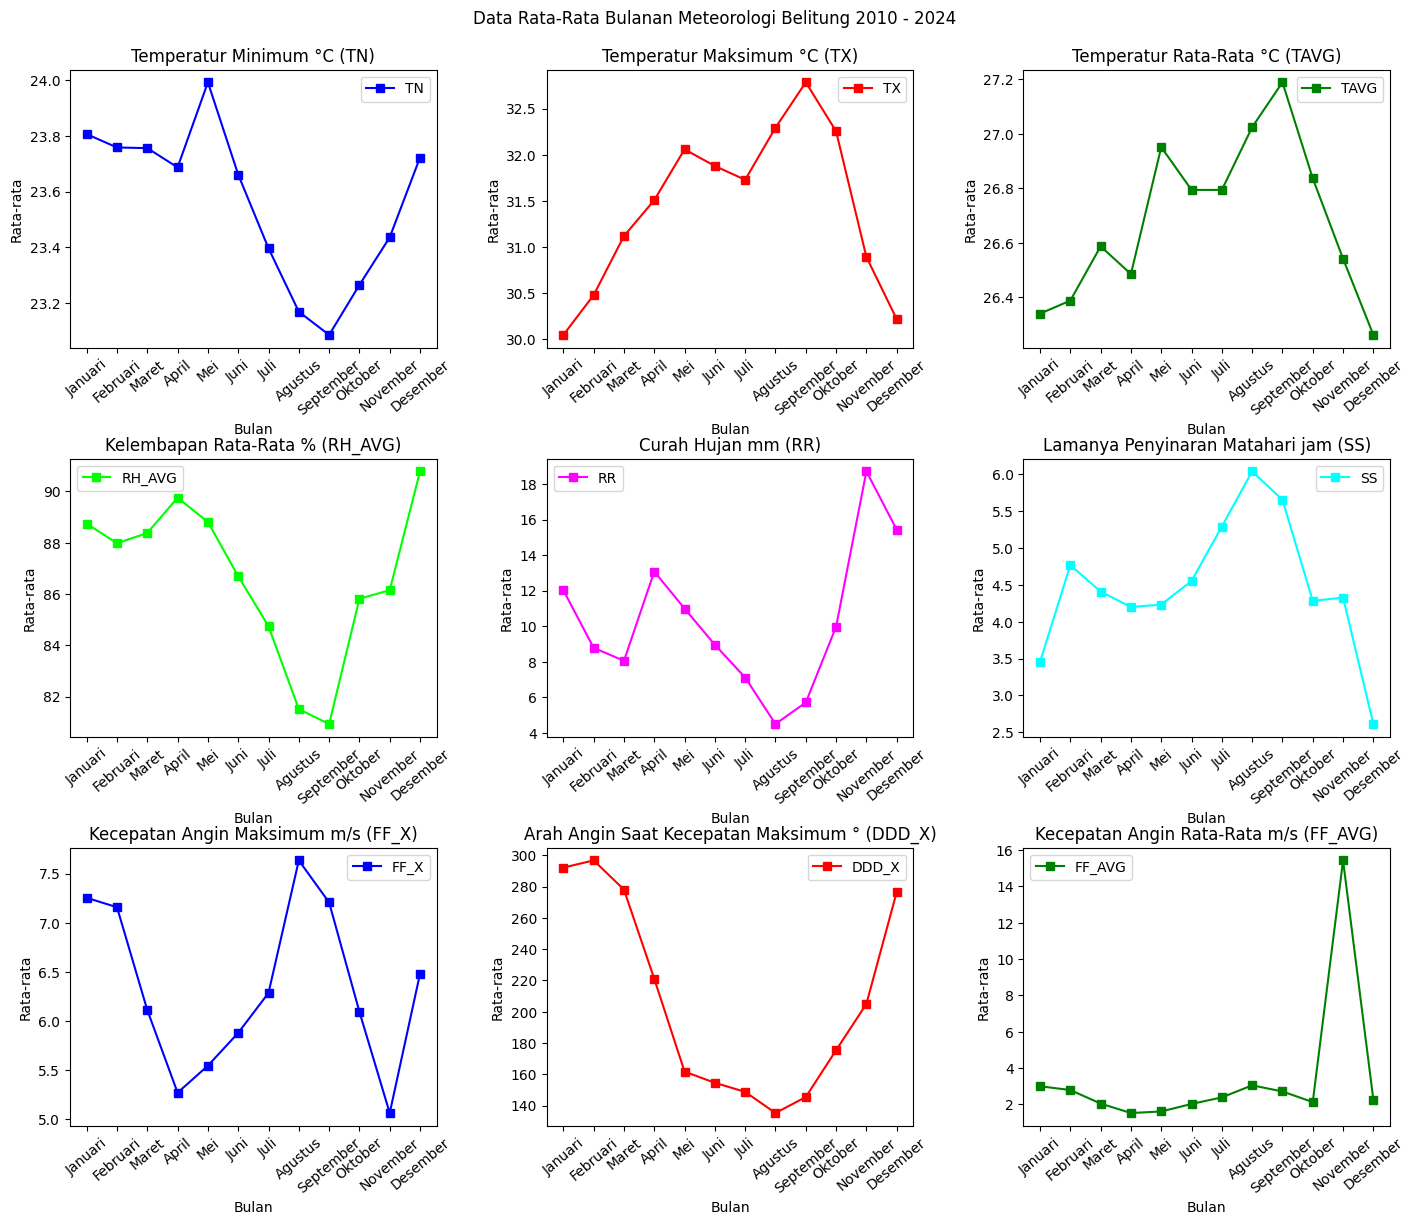

In [34]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(left=0.07, right=0.95, bottom=0.05, top=0.93, wspace=0.3, hspace=0.4)

bulan_order = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

plt.subplot(3, 3, 1)
uas.groupby('Bulan')['TN'].mean().plot(marker = 's', legend=True, color = 'blue')
plt.xticks(range(1, 13), bulan_order, rotation=40)
plt.title('Temperatur Minimum °C (TN)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 2)
uas.groupby('Bulan')['TX'].mean().plot(marker = 's', legend=True, color = 'red')
plt.xticks(range(1, 13), bulan_order, rotation=40)
plt.title('Temperatur Maksimum °C (TX)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 3)
uas.groupby('Bulan')['TAVG'].mean().plot(marker = 's', legend=True, color = 'green')
plt.xticks(range(1, 13), bulan_order, rotation=40)
plt.title('Temperatur Rata-Rata °C (TAVG)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 4)
uas.groupby('Bulan')['RH_AVG'].mean().plot(marker = 's', legend=True, color = 'lime')
plt.xticks(range(1, 13), bulan_order, rotation=40)
plt.title('Kelembapan Rata-Rata % (RH_AVG)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 5)
uas.groupby('Bulan')['RR'].mean().plot(marker = 's', legend=True, color = 'magenta')
plt.xticks(range(1, 13), bulan_order, rotation=40)
plt.title('Curah Hujan mm (RR)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 6)
uas.groupby('Bulan')['SS'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.xticks(range(1, 13), bulan_order, rotation=40)
plt.title('Lamanya Penyinaran Matahari jam (SS)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 7)
uas.groupby('Bulan')['FF_X'].mean().plot(marker = 's', legend=True, color = 'blue')
plt.xticks(range(1, 13), bulan_order, rotation=40)
plt.title('Kecepatan Angin Maksimum m/s (FF_X)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 8)
uas.groupby('Bulan')['DDD_X'].mean().plot(marker = 's', legend=True, color = 'red')
plt.xticks(range(1, 13), bulan_order, rotation=40)
plt.title('Arah Angin Saat Kecepatan Maksimum ° (DDD_X)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 9)
uas.groupby('Bulan')['FF_AVG'].mean().plot(marker = 's', legend=True, color = 'green')
plt.xticks(range(1, 13), bulan_order, rotation=40)
plt.title('Kecepatan Angin Rata-Rata m/s (FF_AVG)')
plt.ylabel('Rata-rata')

plt.suptitle("Data Rata-Rata Bulanan Meteorologi Belitung 2010 - 2024")
plt.show()

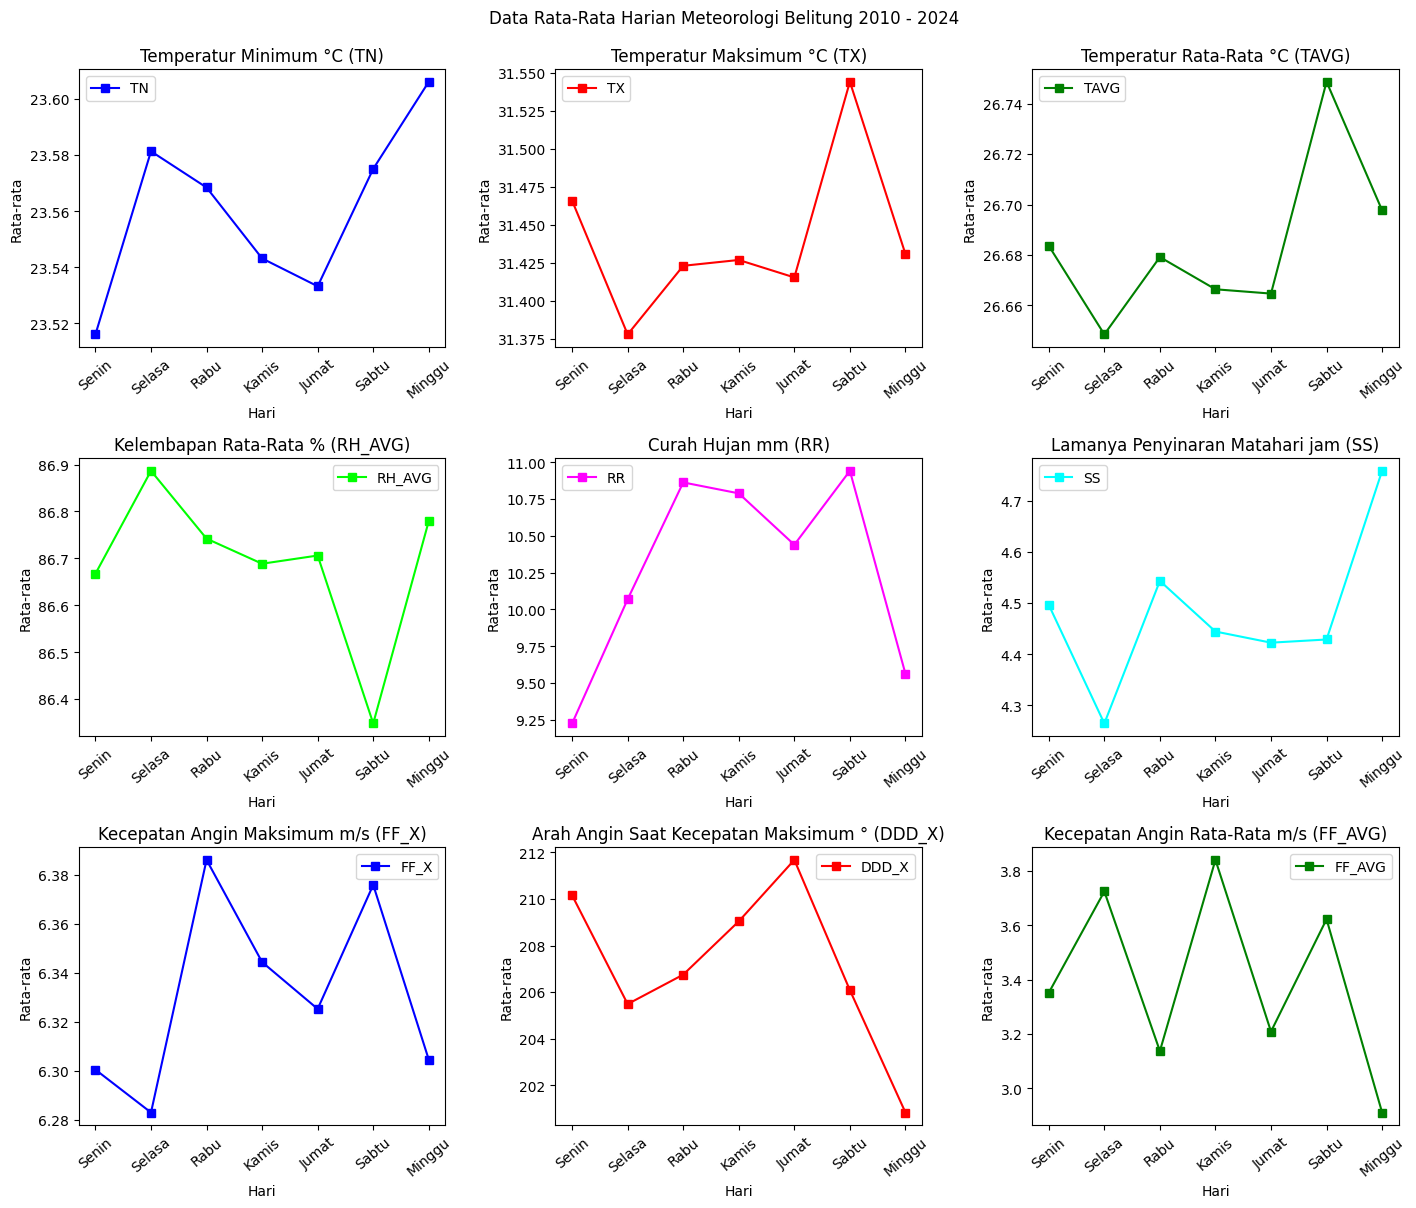

In [35]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(left=0.07, right=0.95, bottom=0.05, top=0.93, wspace=0.3, hspace=0.4)

hari_order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

plt.subplot(3, 3, 1)
uas.groupby('Hari')['TN'].mean().plot(marker = 's', legend=True, color = 'blue')
plt.xticks(range(0, 7), hari_order, rotation=40)
plt.title('Temperatur Minimum °C (TN)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 2)
uas.groupby('Hari')['TX'].mean().plot(marker = 's', legend=True, color = 'red')
plt.xticks(range(0, 7), hari_order, rotation=40)
plt.title('Temperatur Maksimum °C (TX)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 3)
uas.groupby('Hari')['TAVG'].mean().plot(marker = 's', legend=True, color = 'green')
plt.xticks(range(0, 7), hari_order, rotation=40)
plt.title('Temperatur Rata-Rata °C (TAVG)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 4)
uas.groupby('Hari')['RH_AVG'].mean().plot(marker = 's', legend=True, color = 'lime')
plt.xticks(range(0, 7), hari_order, rotation=40)
plt.title('Kelembapan Rata-Rata % (RH_AVG)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 5)
uas.groupby('Hari')['RR'].mean().plot(marker = 's', legend=True, color = 'magenta')
plt.xticks(range(0, 7), hari_order, rotation=40)
plt.title('Curah Hujan mm (RR)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 6)
uas.groupby('Hari')['SS'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.xticks(range(0, 7), hari_order, rotation=40)
plt.title('Lamanya Penyinaran Matahari jam (SS)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 7)
uas.groupby('Hari')['FF_X'].mean().plot(marker = 's', legend=True, color = 'blue')
plt.xticks(range(0, 7), hari_order, rotation=40)
plt.title('Kecepatan Angin Maksimum m/s (FF_X)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 8)
uas.groupby('Hari')['DDD_X'].mean().plot(marker = 's', legend=True, color = 'red')
plt.xticks(range(0, 7), hari_order, rotation=40)
plt.title('Arah Angin Saat Kecepatan Maksimum ° (DDD_X)')
plt.ylabel('Rata-rata')

plt.subplot(3, 3, 9)
uas.groupby('Hari')['FF_AVG'].mean().plot(marker = 's', legend=True, color = 'green')
plt.xticks(range(0, 7), hari_order, rotation=40)
plt.title('Kecepatan Angin Rata-Rata m/s (FF_AVG)')
plt.ylabel('Rata-rata')

plt.suptitle("Data Rata-Rata Harian Meteorologi Belitung 2010 - 2024")
plt.show()

HEATMAP KORELASI FEARSON

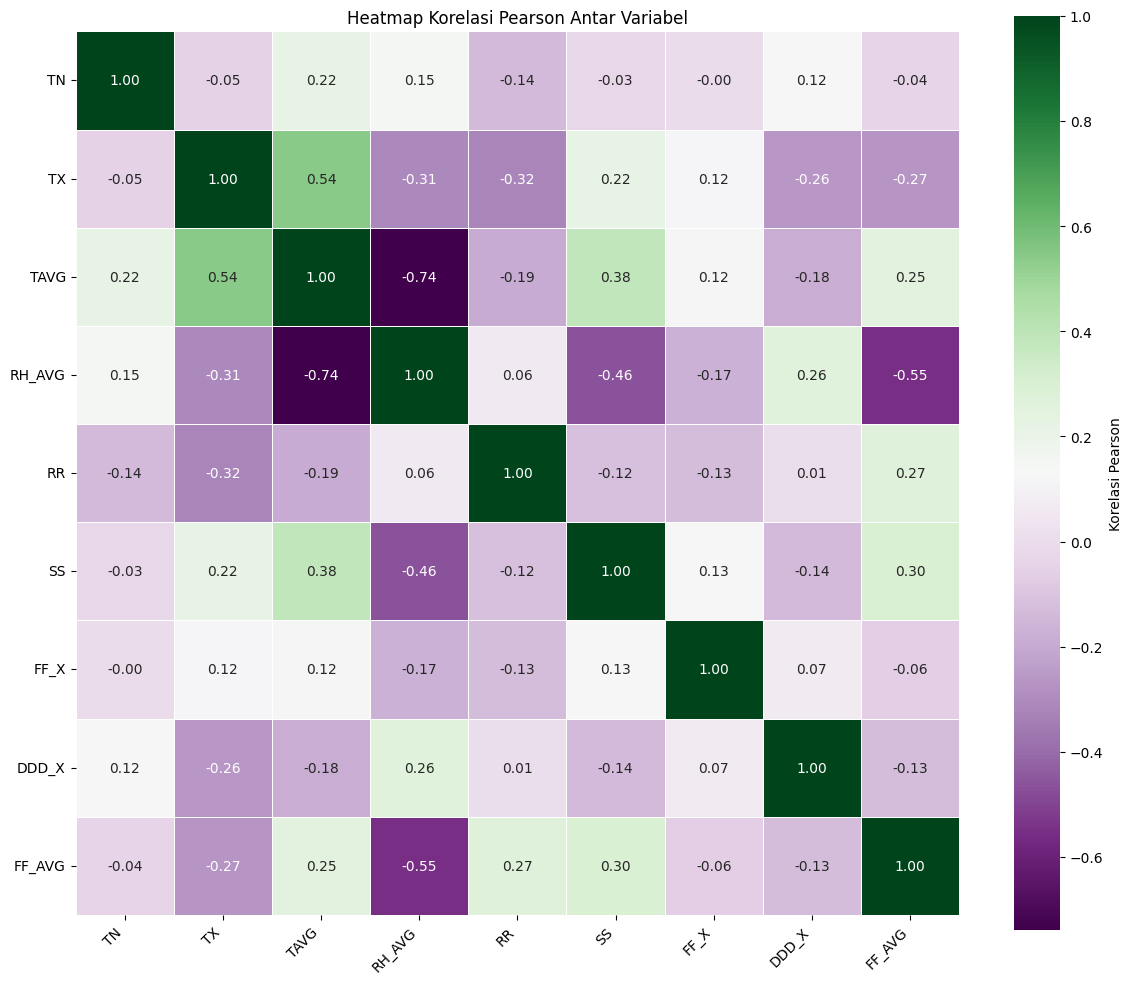

In [38]:
# Daftar kolom numerik tanpa 'Tahun' dan 'Bulan'
num_cols = uas.select_dtypes(include='number').drop(columns=['Tahun', 'Bulan']).columns

# Hitung korelasi Pearson
corr_matrix = uas[num_cols].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='PRGn', fmt=".2f", linewidths=0.5, square=True, cbar_kws={"label": "Korelasi Pearson"})
plt.title("Heatmap Korelasi Pearson Antar Variabel")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
uas.describe()

,Tanggal,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,Tahun,Bulan
count,5479,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2017-07-01 23:59:59.999999744,23.560504,31.440628,26.684121,86.688246,10.269575,4.479832,6.331447,207.147472,3.399160,2017.000730,6.522723
min,2010-01-01 00:00:00,19.600000,22.600000,22.700000,24.400000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,1.000000
25%,2013-10-01 12:00:00,23.000000,30.400000,26.000000,83.000000,0.000000,2.000000,5.000000,130.000000,2.000000,2013.000000,4.000000
50%,2017-07-02 00:00:00,23.600000,31.600000,26.700000,88.000000,1.500000,4.500000,6.000000,180.000000,2.000000,2017.000000,7.000000
75%,2021-04-01 12:00:00,24.100000,32.700000,27.400000,92.000000,11.900000,6.800000,8.000000,300.000000,3.000000,2021.000000,10.000000
max,2024-12-31 00:00:00,26.800000,36.200000,34.200000,100.000000,232.300000,76.500000,18.000000,360.000000,350.000000,2024.000000,12.000000
std,NaN,0.898308,1.786256,1.102760,7.668187,19.188206,3.588070,2.338458,100.796114,17.191818,4.321085,3.449075
